
**Q1. Problem Statement: Data Pre-Processing (Categorical data)**

You are given a dataset – “hotel_bookings.csv.” The dataset has a high number of null and  elements that need to be cleansed;  Your job is to create a separate DataFrame with only categorical columns and  perform the  following operations:
1.	Find the number of null values in each column of the new DataFrame
2.	Replace the null values with mode 
3.	In the "hotel" column, replace the hotel names with "0" and "1" based on the condition that – if, "hotel" = "city_hotel", then "hotel" = "1";  else, "0"
4.	Using the label encoder, assign a unique country code to each country
5.	Using onehot encoder, encode the “month” column



**Step-1:** Loading the data into a DataFrame.

In [18]:

# modules we'll use
import pandas as pd
import numpy as np

# read in all our data
hotel_df = pd.read_csv("/content/hotel_bookings.csv")
# set seed for reproducibility
np.random.seed(0) 

**Step-2:** Initial screening of data.

In [19]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [20]:
# look at a few rows of the nfl_data file. I can see a handful of missing data already!
hotel_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Step-3:** Finding null values in data.

In [21]:
# get the number of missing data points per column
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Step-4:** Dropping null columns from data.

In [22]:
hotel_df =hotel_df.drop(['company','agent'],  axis = 1)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Step-5:** Making a different DataFrame with all the categorical data.

In [23]:
cat_df_hotel = hotel_df.select_dtypes(include=['object']).copy()
cat_df_hotel.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


**Step-6:** Finding null values in categorical DataFrame and replacing them with mode.

In [24]:
print(cat_df_hotel.isnull().sum())

hotel                        0
arrival_date_month           0
meal                         0
country                    488
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64


In [25]:
cat_df_hotel = cat_df_hotel.fillna(cat_df_hotel['country'].value_counts().index[0])
print("After replacing null values with mode:")
print(cat_df_hotel.isnull().sum())

After replacing null values with mode:
hotel                      0
arrival_date_month         0
meal                       0
country                    0
market_segment             0
distribution_channel       0
reserved_room_type         0
assigned_room_type         0
deposit_type               0
customer_type              0
reservation_status         0
reservation_status_date    0
dtype: int64


**Step-7:** Describing categorical DataFrame.

In [26]:
cat_df_hotel.describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,49078,56477,97870,85994,74053,104641,89613,75166,1461


**Step-8:** Encoding data from "hotel" column based on condition that - if "hotel" = "City_hotel", 1; else, 0.

In [27]:
cat_df_hotel_specific = cat_df_hotel.copy()
cat_df_hotel_specific['hotel'] = np.where(cat_df_hotel_specific['hotel'].str.contains('City Hotel'), 1, 0)

cat_df_hotel_specific.sample(10)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
5627,0,May,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-05-13
119322,1,August,BB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-03
75310,1,August,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient-Party,Canceled,2015-07-02
90032,1,May,BB,MAR,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2016-06-01
75368,1,August,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient-Party,Canceled,2015-07-02
51740,1,May,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient,Canceled,2016-01-18
115665,1,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-07-09
118740,1,August,HB,ESP,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-08-25
101671,1,November,BB,CHE,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-11-16
108262,1,March,BB,BEL,Offline TA/TO,TA/TO,A,D,No Deposit,Transient,Check-Out,2017-03-25


**Step-9:** Assigning a numeric country code to each country using label encoder.

In [28]:
cat_df_hotel_sklearn = cat_df_hotel.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_hotel_sklearn['country_code'] = lb_make.fit_transform(cat_df_hotel['country'])

cat_df_hotel_sklearn.sample(5) #Results in appending a new column to df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,country_code
43165,City Hotel,September,BB,ESP,Groups,TA/TO,A,D,No Deposit,Transient-Party,Check-Out,2015-09-18,51
39363,Resort Hotel,August,BB,PRT,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-08-16,135
30407,Resort Hotel,November,BB,IRL,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-11-21,76
82808,City Hotel,February,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient,Canceled,2016-01-06,135
41544,City Hotel,August,BB,PRT,Direct,Direct,A,A,No Deposit,Transient,No-Show,2015-08-18,135


**Step-10:** Encoding the "arrival_date_month" column, using onehot encoder.

In [29]:
cat_df_hotel_onehot = cat_df_hotel.copy()
cat_df_hotel_onehot = pd.get_dummies(cat_df_hotel_onehot, columns=['arrival_date_month'])

print(cat_df_hotel_onehot.head())

          hotel meal country market_segment distribution_channel  \
0  Resort Hotel   BB     PRT         Direct               Direct   
1  Resort Hotel   BB     PRT         Direct               Direct   
2  Resort Hotel   BB     GBR         Direct               Direct   
3  Resort Hotel   BB     GBR      Corporate            Corporate   
4  Resort Hotel   BB     GBR      Online TA                TA/TO   

  reserved_room_type assigned_room_type deposit_type customer_type  \
0                  C                  C   No Deposit     Transient   
1                  C                  C   No Deposit     Transient   
2                  A                  C   No Deposit     Transient   
3                  A                  A   No Deposit     Transient   
4                  A                  A   No Deposit     Transient   

  reservation_status  ... arrival_date_month_December  \
0          Check-Out  ...                           0   
1          Check-Out  ...                           0   

**Q2. Problem Statement: Data Pre-Processing (Exponential data)**

Create a DataFrame to store exponential data using the NumPy random() function as shown in the dataset section below, and perform the following operations:
1.	Using the minmax_scaling() function, scale the data between 0 to 1, and plot the original data and scaled data using the Seaborn library 
2.	Using preprocessing.normalize() function, normalize the data, and plot the original data and normalized data using the Seaborn library


**Step-1:** Importing libraries.

In [30]:
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Step-2:** Creating exponential data using NumPy.

In [31]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)
df2= pd.DataFrame(original_data)
df2.head()

,0
0,1.837651
1,1.017965
2,1.939607
3,0.972827
4,1.554109


**Step-3:** Scaling data between 0 and 1 using minmax_scaling.

<ipython-input-32-fdb1b59946c3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
<ipython-input-32-fdb1b59946c3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data, ax=ax[1])


Text(0.5, 1.0, 'Scaled data')

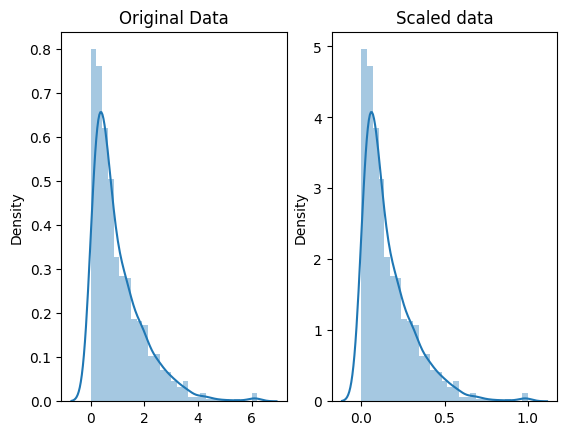

In [32]:
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(df2, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

**Step-4:** Normalizing the data using the preprocessing.normalize() function.

In [33]:
# normalize the exponential data with preprocessing
from scipy import stats
from sklearn import preprocessing
normalized_data = preprocessing.normalize(df2)   

<ipython-input-34-25e23f7a5900>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[0], ax=ax[0])
<ipython-input-34-25e23f7a5900>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data, ax=ax[1])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Datas

Text(0.5, 1.0, 'Normalized data')

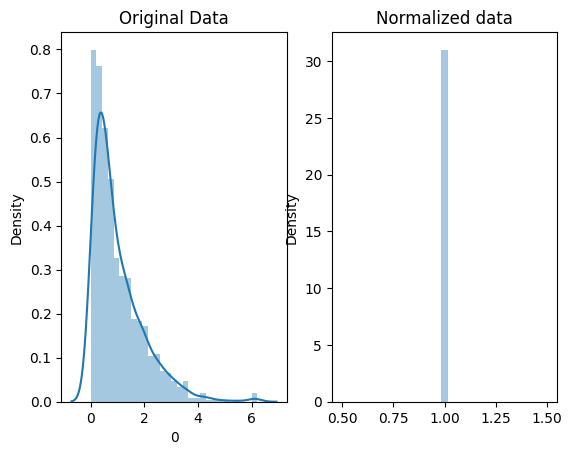

In [34]:
# normalize the exponential data 
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df2[0], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data, ax=ax[1])
ax[1].set_title("Normalized data")